In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [222]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [223]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [224]:
# change thalachh to thalach
df.rename(columns={'thalachh':'thalach'}, inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exng     303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slp      303 non-null    int64  
 11  caa      303 non-null    int64  
 12  thall    303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [226]:
df.isnull().sum()

age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
caa        0
thall      0
output     0
dtype: int64

In [227]:
df.duplicated().sum()

1

In [228]:
df.drop_duplicates(inplace=True)

In [229]:
df.duplicated().sum()

0

/var/folders/cz/2r81cdl55x7dcrcbqk6x7n300000gq/T/ipykernel_15168/3545693647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=df, palette="bwr")


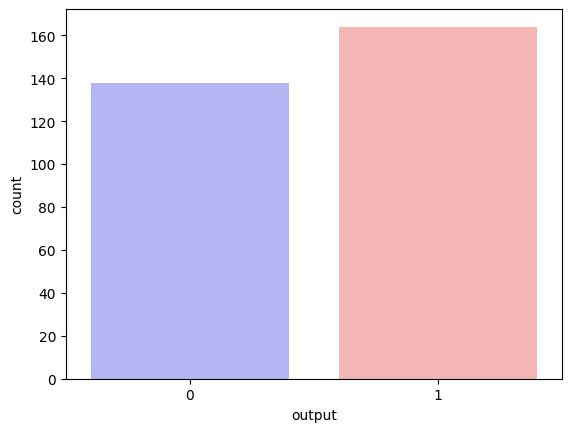

In [230]:
# Data Visualization (EDA)
sns.countplot(x='output', data=df, palette="bwr")
plt.show()

In [231]:
# scale the dat ausing StandardScaler
sc = StandardScaler()
# make a new variable to foreach through the columns and scale them



df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

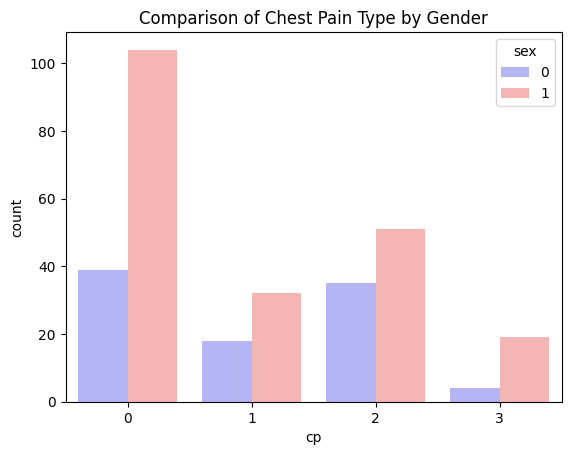

In [232]:
# Compare "gender" and "cp"
gender_cp = pd.crosstab(df['sex'], df['cp'])

# Visualize the comparison
sns.countplot(x='cp', hue='sex', data=df, palette='bwr')
plt.title('Comparison of Chest Pain Type by Gender')
plt.show()


<Figure size 1000x1000 with 0 Axes>

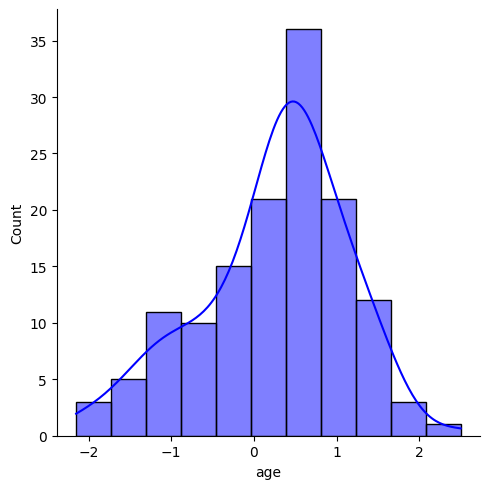

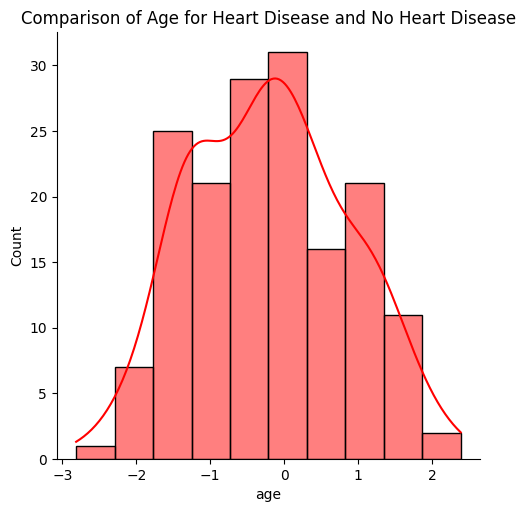

In [233]:
plt.figure(figsize=(10, 10))
sns.displot(df[df['output'] == 0]['age'], color='blue', kde=True)
sns.displot(df[df['output'] == 1]['age'], color='red', kde=True)
plt.title('Comparison of Age for Heart Disease and No Heart Disease')
plt.show()

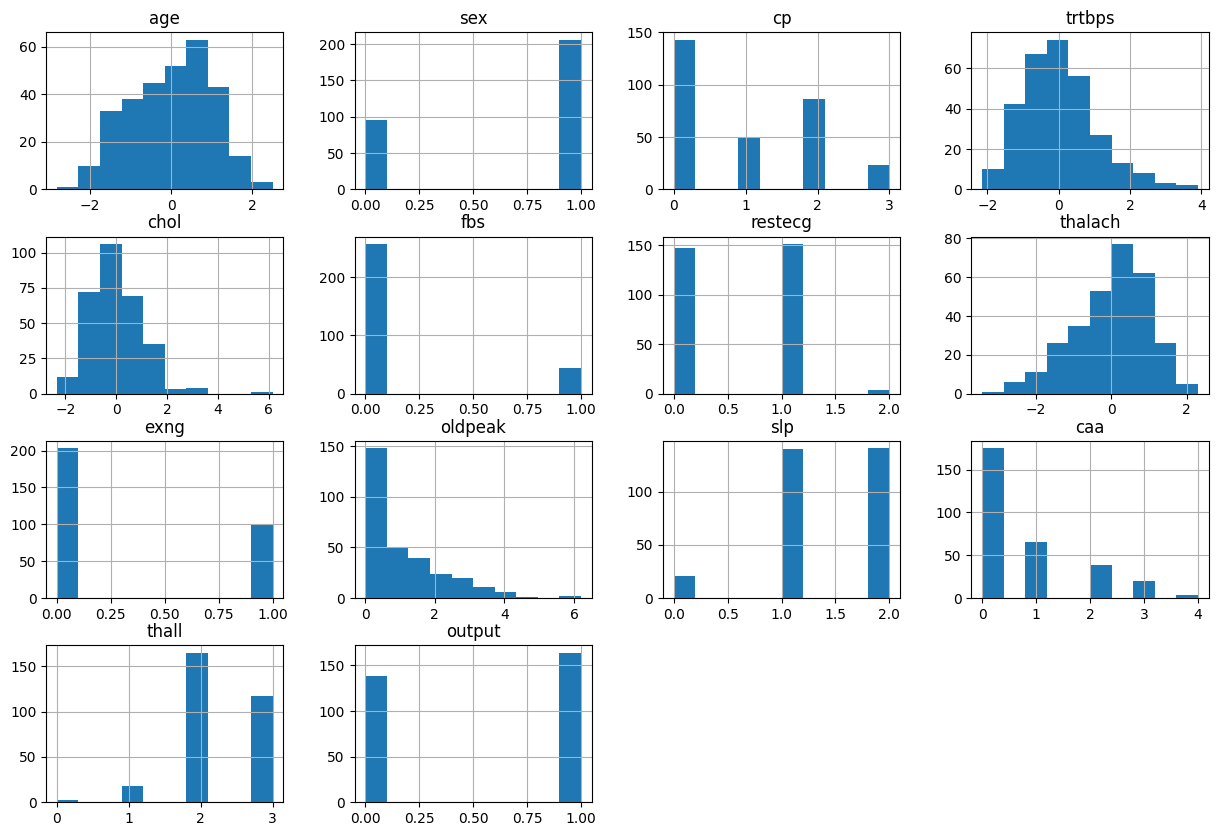

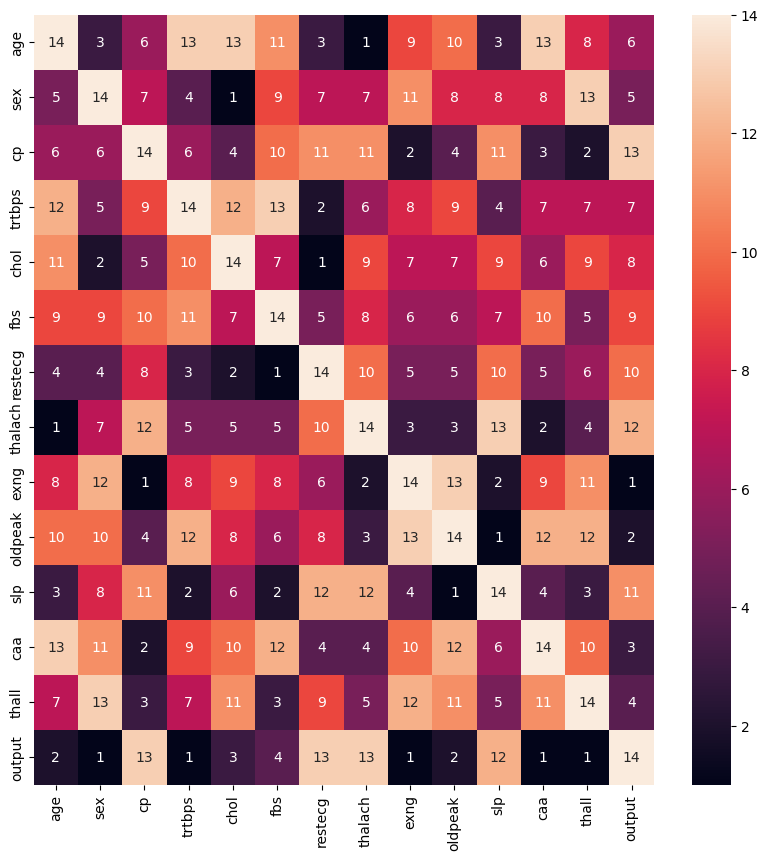

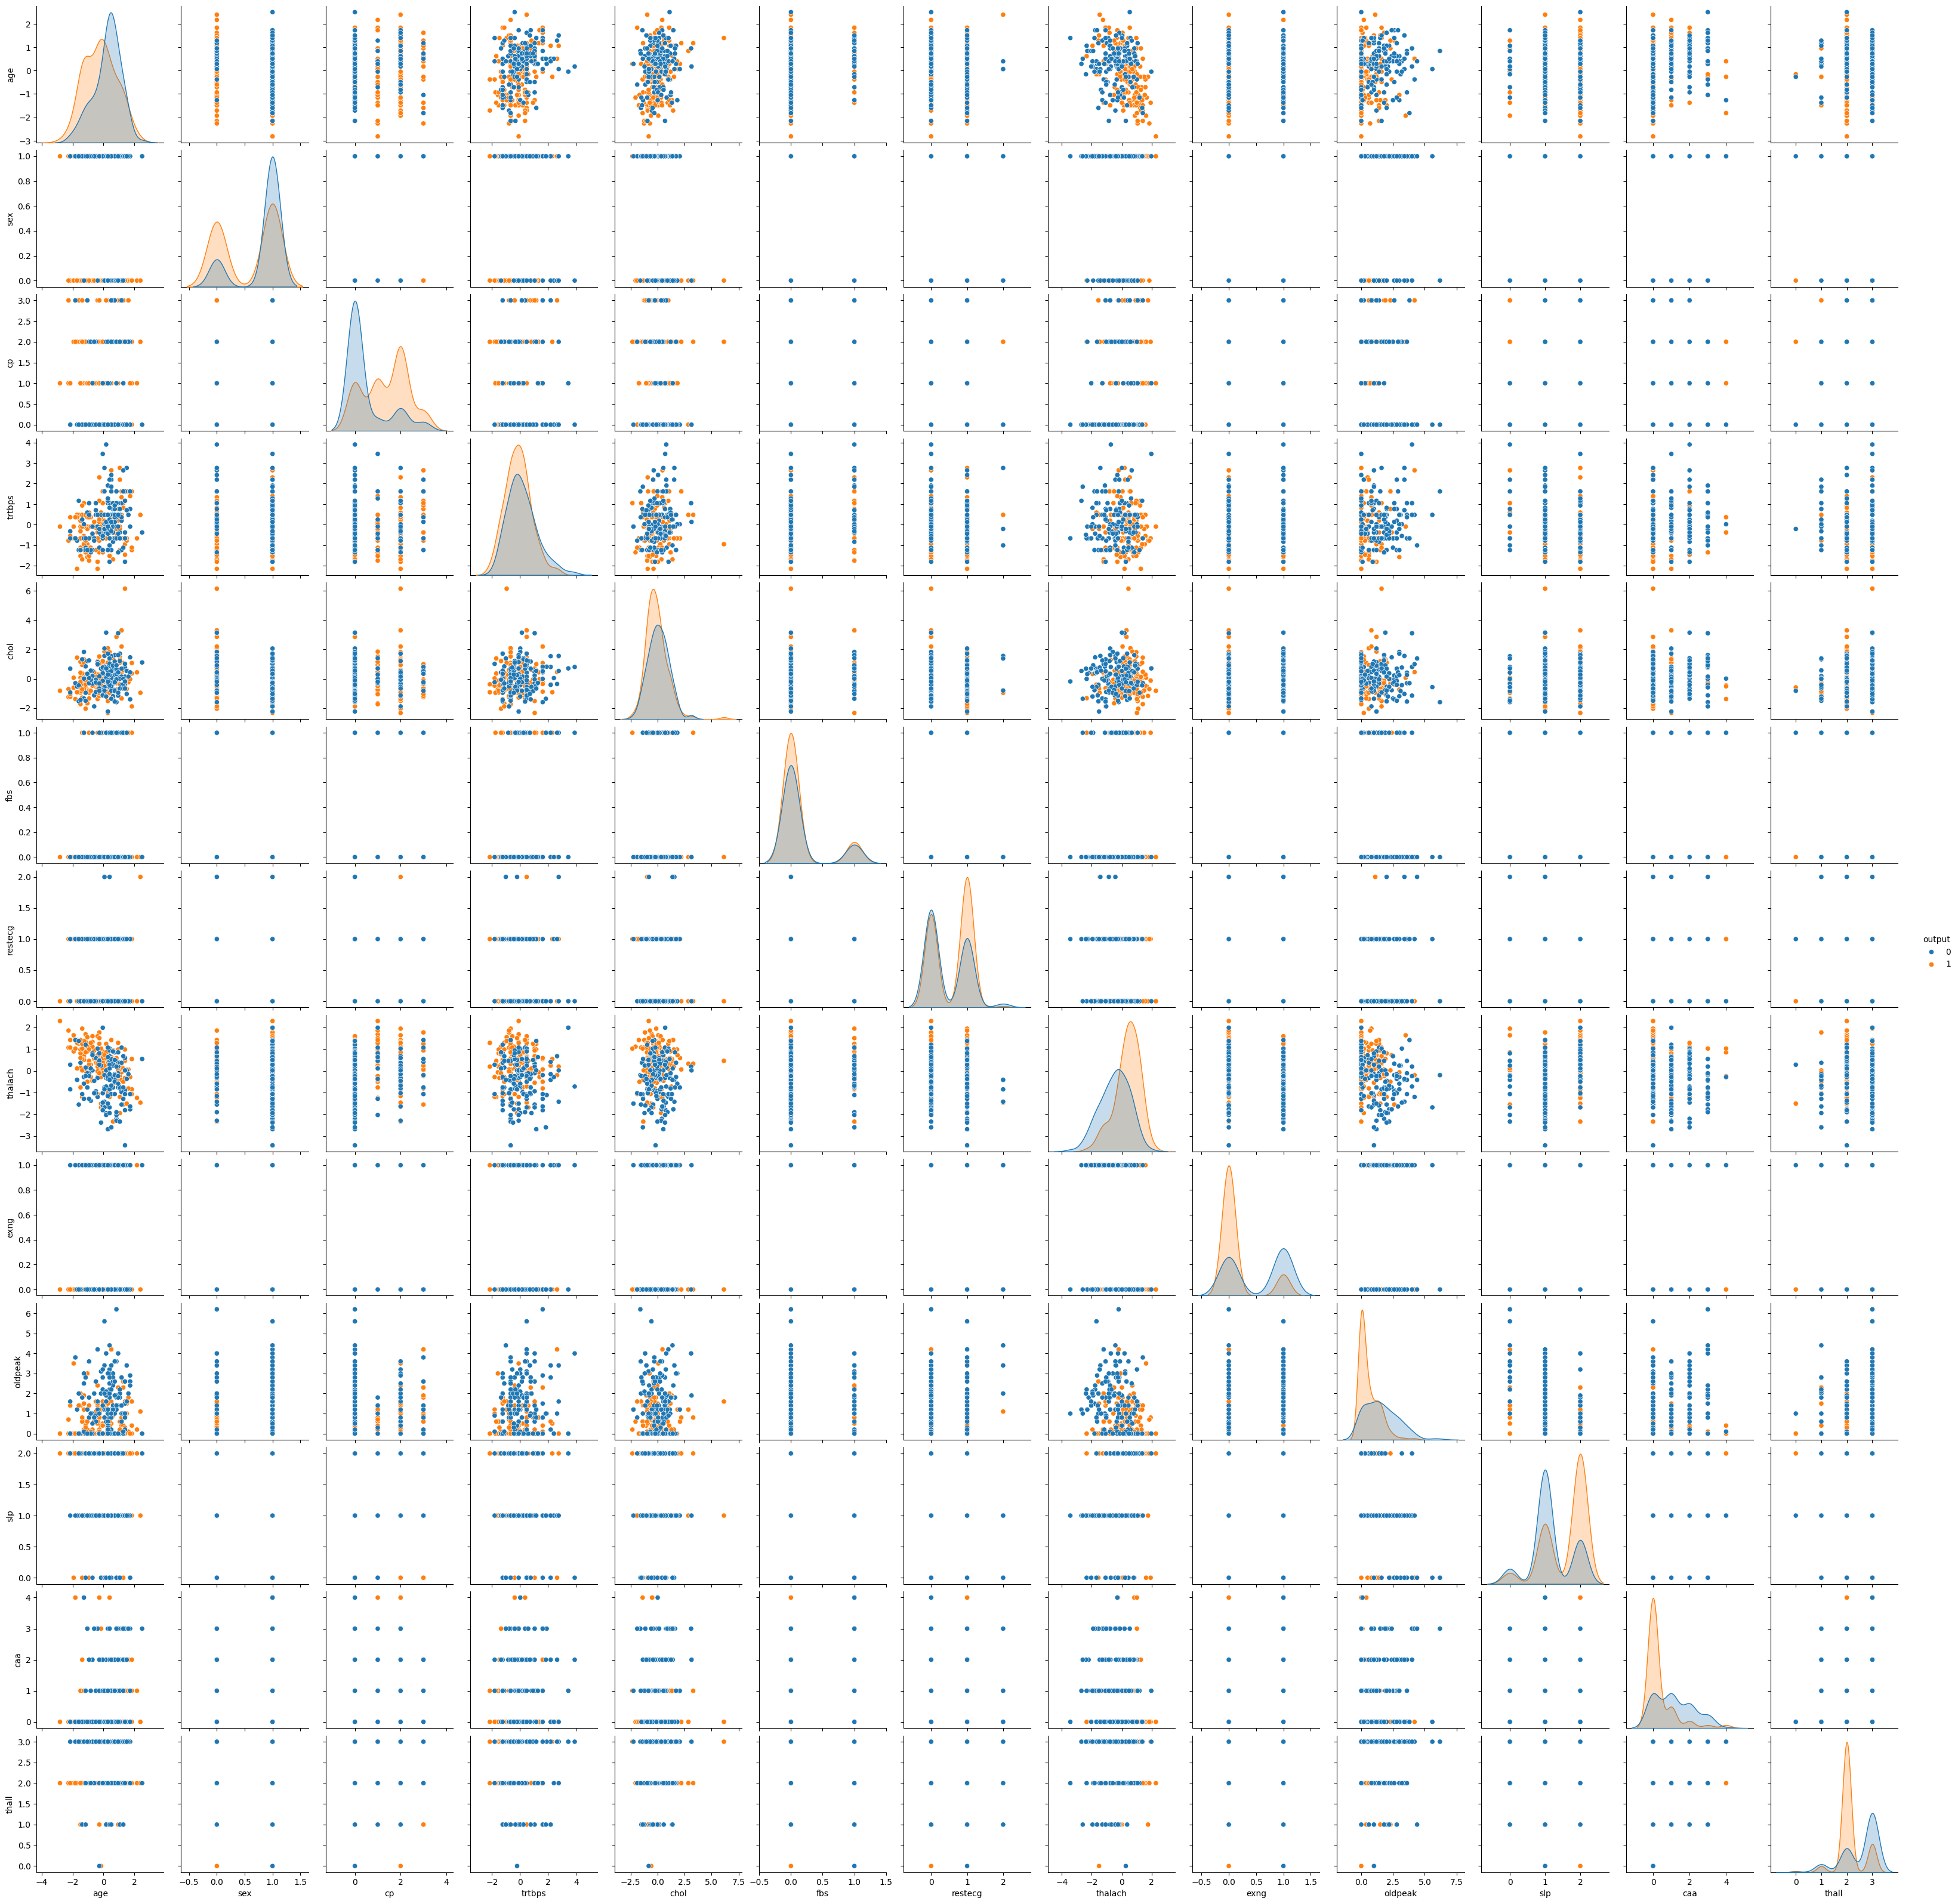

In [241]:
df.hist(figsize=(15,10))
plt.show()

# check for correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().rank(),annot=True)
plt.show()

sns.pairplot(df,hue='output')
plt.show()

In [235]:
X = df.drop(['output'], axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [236]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_pred)
print(f"Gaussian Naive Bayes Accuracy: {gnb_acc*100}%")

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_acc*100}%")

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc*100}%")

Gaussian Naive Bayes Accuracy: 85.24590163934425%
XGBoost Accuracy: 83.60655737704919%
Random Forest Accuracy: 85.24590163934425%


# Conclusion

Gaussian Naive Bayes (GNB) and Random Forest has the highest model accuracy. Better use them. Using Logistic Regression might have higher accuracy than all of the built models.